In [62]:
import pandas as pd
import numpy as np

## Data

In [321]:
url = 'Yeni Metin Belgesi.html'
covid_tr = pd.read_html(url, encoding="UTF-8", decimal=',', thousands='.')
df = covid_tr[0].copy()

In [322]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,22 NİSAN 2021,45040704.0,4501382,37329.0,2.9,3463.0,3909935.0,54791.0,3128.0,312109.0,354.0,65593.0
1,21 NİSAN 2021,44728595.0,4446591,36975.0,2.9,3398.0,3844342.0,61967.0,2932.0,318839.0,362.0,52213.0
2,20 NİSAN 2021,44409756.0,4384624,36613.0,2.9,3375.0,3792129.0,61028.0,2895.0,322128.0,346.0,55592.0
3,19 NİSAN 2021,44087628.0,4323596,36267.0,2.9,3319.0,3736537.0,55149.0,2862.0,318869.0,341.0,48947.0
4,18 NİSAN 2021,43768759.0,4268447,35926.0,3.3,3275.0,3687590.0,55802.0,3101.0,301243.0,318.0,43856.0
...,...,...,...,...,...,...,...,...,...,...,...,...
403,15 MART 2020,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,14 MART 2020,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,13 MART 2020,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,12 MART 2020,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [323]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 12 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tarih                         408 non-null    object 
 1   Toplam Test Sayısı            392 non-null    float64
 2   Toplam Vaka Sayısı            408 non-null    int64  
 3   Toplam Vefat Sayısı           402 non-null    float64
 4   Hastalarda Zatürre Oranı (%)  268 non-null    float64
 5   Ağır Hasta Sayısı             268 non-null    float64
 6   Toplam İyileşen Hasta Sayısı  392 non-null    float64
 7   Bugünkü Vaka Sayısı           149 non-null    float64
 8   Bugünkü Hasta Sayısı          392 non-null    float64
 9   Bugünkü Test Sayısı           392 non-null    float64
 10  Bugünkü Vefat Sayısı          392 non-null    float64
 11  Bugünkü İyileşen Sayısı       384 non-null    float64
dtypes: float64(10), int64(1), object(1)
memory usage: 38.4+ KB


In [324]:
df.isnull().sum()

Tarih                             0
Toplam Test Sayısı               16
Toplam Vaka Sayısı                0
Toplam Vefat Sayısı               6
Hastalarda Zatürre Oranı (%)    140
Ağır Hasta Sayısı               140
Toplam İyileşen Hasta Sayısı     16
Bugünkü Vaka Sayısı             259
Bugünkü Hasta Sayısı             16
Bugünkü Test Sayısı              16
Bugünkü Vefat Sayısı             16
Bugünkü İyileşen Sayısı          24
dtype: int64

## Data Tipi Değiştirme

In [325]:
# df["Toplam Test Sayısı"] = df["Toplam Test Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Toplam Vaka Sayısı"] = df["Toplam Vaka Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Toplam Vefat Sayısı"] = df["Toplam Vefat Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Ağır Hasta Sayısı"] = df["Ağır Hasta Sayısı"].str.replace('.', '', regex=True).astype(float)  

# df["Toplam İyileşen Hasta Sayısı"] = df["Toplam İyileşen Hasta Sayısı"].str.replace('.', '', regex=True).astype('float')  

# df["Bugünkü Vaka Sayısı"] = df["Bugünkü Vaka Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü Hasta Sayısı"] = df["Bugünkü Hasta Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü Test Sayısı"] = df["Bugünkü Test Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü Vefat Sayısı"] = df["Bugünkü Vefat Sayısı"].str.replace('.', '', regex=True).astype(float) 
# df["Bugünkü İyileşen Sayısı"] = df["Bugünkü İyileşen Sayısı"].str.replace('.', '', regex=True).astype(float) 

In [326]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,22 NİSAN 2021,45040704.0,4501382,37329.0,2.9,3463.0,3909935.0,54791.0,3128.0,312109.0,354.0,65593.0
1,21 NİSAN 2021,44728595.0,4446591,36975.0,2.9,3398.0,3844342.0,61967.0,2932.0,318839.0,362.0,52213.0
2,20 NİSAN 2021,44409756.0,4384624,36613.0,2.9,3375.0,3792129.0,61028.0,2895.0,322128.0,346.0,55592.0
3,19 NİSAN 2021,44087628.0,4323596,36267.0,2.9,3319.0,3736537.0,55149.0,2862.0,318869.0,341.0,48947.0
4,18 NİSAN 2021,43768759.0,4268447,35926.0,3.3,3275.0,3687590.0,55802.0,3101.0,301243.0,318.0,43856.0
...,...,...,...,...,...,...,...,...,...,...,...,...
403,15 MART 2020,NaN,18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,14 MART 2020,NaN,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
405,13 MART 2020,NaN,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
406,12 MART 2020,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Eksik Verileri Doldurma

In [327]:
df = df.apply(lambda x: x.fillna(0))

In [328]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,22 NİSAN 2021,45040704.0,4501382,37329.0,2.9,3463.0,3909935.0,54791.0,3128.0,312109.0,354.0,65593.0
1,21 NİSAN 2021,44728595.0,4446591,36975.0,2.9,3398.0,3844342.0,61967.0,2932.0,318839.0,362.0,52213.0
2,20 NİSAN 2021,44409756.0,4384624,36613.0,2.9,3375.0,3792129.0,61028.0,2895.0,322128.0,346.0,55592.0
3,19 NİSAN 2021,44087628.0,4323596,36267.0,2.9,3319.0,3736537.0,55149.0,2862.0,318869.0,341.0,48947.0
4,18 NİSAN 2021,43768759.0,4268447,35926.0,3.3,3275.0,3687590.0,55802.0,3101.0,301243.0,318.0,43856.0
...,...,...,...,...,...,...,...,...,...,...,...,...
403,15 MART 2020,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,14 MART 2020,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405,13 MART 2020,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,12 MART 2020,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [329]:
df.isnull().sum()

Tarih                           0
Toplam Test Sayısı              0
Toplam Vaka Sayısı              0
Toplam Vefat Sayısı             0
Hastalarda Zatürre Oranı (%)    0
Ağır Hasta Sayısı               0
Toplam İyileşen Hasta Sayısı    0
Bugünkü Vaka Sayısı             0
Bugünkü Hasta Sayısı            0
Bugünkü Test Sayısı             0
Bugünkü Vefat Sayısı            0
Bugünkü İyileşen Sayısı         0
dtype: int64

### Tarih

In [330]:
months = {'monthStr':  [' OCAK ', ' ŞUBAT ', ' MART ', ' NİSAN ', ' MAYIS ', ' HAZİRAN ', ' TEMMUZ ', ' AĞUSTOS ',' EYLÜL ',' EKİM ', ' KASIM ', ' ARALIK '],
          'monthInt': ['-01-','-02-','-03-','-04-','-05-','-06-','-07-','-08-','-09-','-10-','-11-','-12-']
         }
for i, j in df.iterrows():
    for k in range(12):
        df["Tarih"][i] = df["Tarih"][i].replace(months["monthStr"][k], months["monthInt"][k])

<ipython-input-330-9d25c4499817>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Tarih"][i] = df["Tarih"][i].replace(months["monthStr"][k], months["monthInt"][k])


In [331]:
import datetime

def date_convert(date_to_convert):
     return datetime.datetime.strptime(date_to_convert, "%d-%m-%Y").strftime("%Y-%m-%d")
    
df['Tarih'] = df['Tarih'].apply(date_convert)

In [332]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2021-04-22,45040704.0,4501382,37329.0,2.9,3463.0,3909935.0,54791.0,3128.0,312109.0,354.0,65593.0
1,2021-04-21,44728595.0,4446591,36975.0,2.9,3398.0,3844342.0,61967.0,2932.0,318839.0,362.0,52213.0
2,2021-04-20,44409756.0,4384624,36613.0,2.9,3375.0,3792129.0,61028.0,2895.0,322128.0,346.0,55592.0
3,2021-04-19,44087628.0,4323596,36267.0,2.9,3319.0,3736537.0,55149.0,2862.0,318869.0,341.0,48947.0
4,2021-04-18,43768759.0,4268447,35926.0,3.3,3275.0,3687590.0,55802.0,3101.0,301243.0,318.0,43856.0
...,...,...,...,...,...,...,...,...,...,...,...,...
403,2020-03-15,0.0,18,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
404,2020-03-14,0.0,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
405,2020-03-13,0.0,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
406,2020-03-12,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [333]:
df = df[::-1].reset_index(drop=True)

### Günlük Vaka Sayısı Doldurulması

In [334]:
for i in range(len(df[:259])):
    if(i == 0):
        df["Bugünkü Vaka Sayısı"][i] = 1
    else:
        a = df["Toplam Vaka Sayısı"][i+1] - df["Toplam Vaka Sayısı"][i]
        df["Bugünkü Vaka Sayısı"][i+1] = a

<ipython-input-334-4f198aebcbe2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bugünkü Vaka Sayısı"][i] = 1
<ipython-input-334-4f198aebcbe2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Bugünkü Vaka Sayısı"][i+1] = a


In [335]:
df

,Tarih,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
0,2020-03-11,0.0,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,2020-03-12,0.0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-03-13,0.0,5,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
3,2020-03-14,0.0,6,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,2020-03-15,0.0,18,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
403,2021-04-18,43768759.0,4268447,35926.0,3.3,3275.0,3687590.0,55802.0,3101.0,301243.0,318.0,43856.0
404,2021-04-19,44087628.0,4323596,36267.0,2.9,3319.0,3736537.0,55149.0,2862.0,318869.0,341.0,48947.0
405,2021-04-20,44409756.0,4384624,36613.0,2.9,3375.0,3792129.0,61028.0,2895.0,322128.0,346.0,55592.0
406,2021-04-21,44728595.0,4446591,36975.0,2.9,3398.0,3844342.0,61967.0,2932.0,318839.0,362.0,52213.0


## Görselleştirmeler

In [336]:
new_df = df.copy()
new_df.index = new_df["Tarih"]
new_df.index = pd.DatetimeIndex(new_df.index)
new_df.drop(["Tarih"], axis=1, inplace=True)

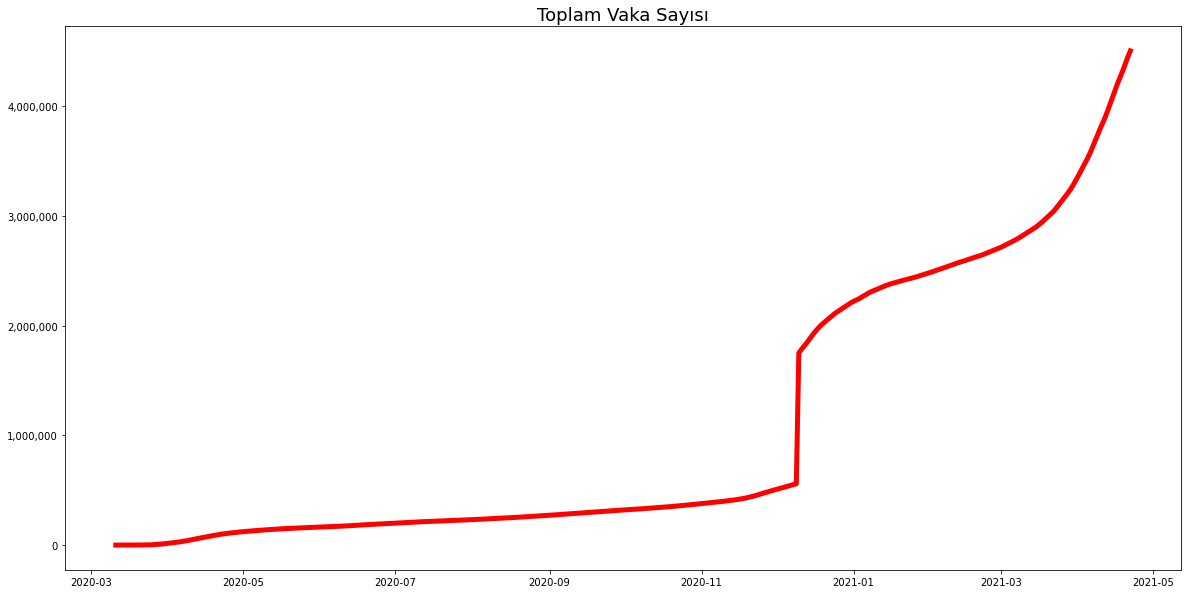

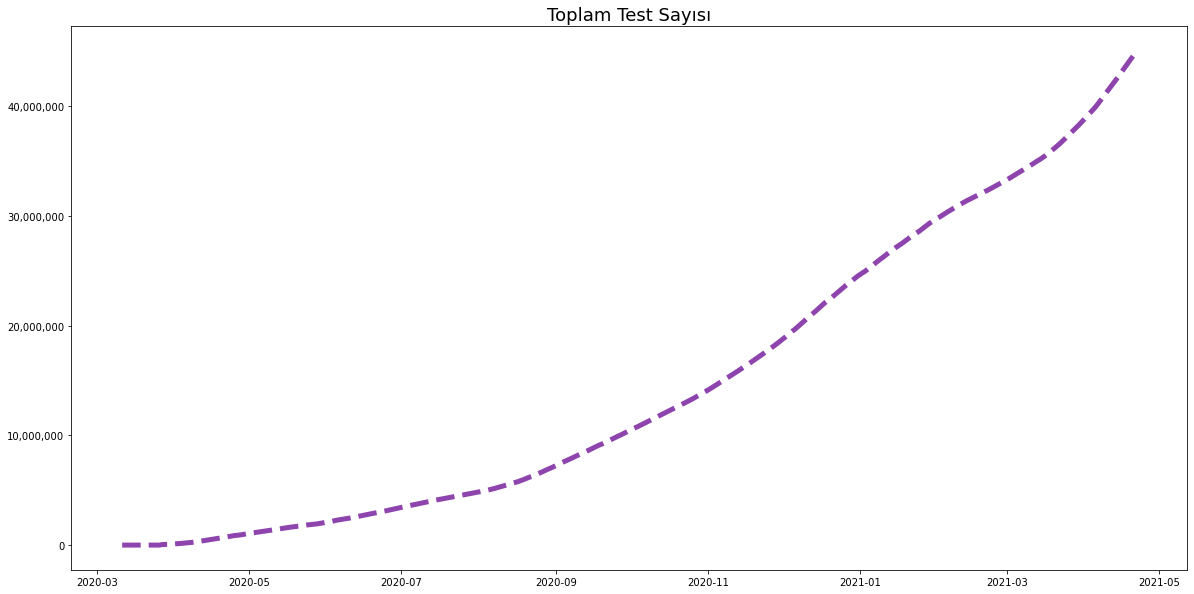

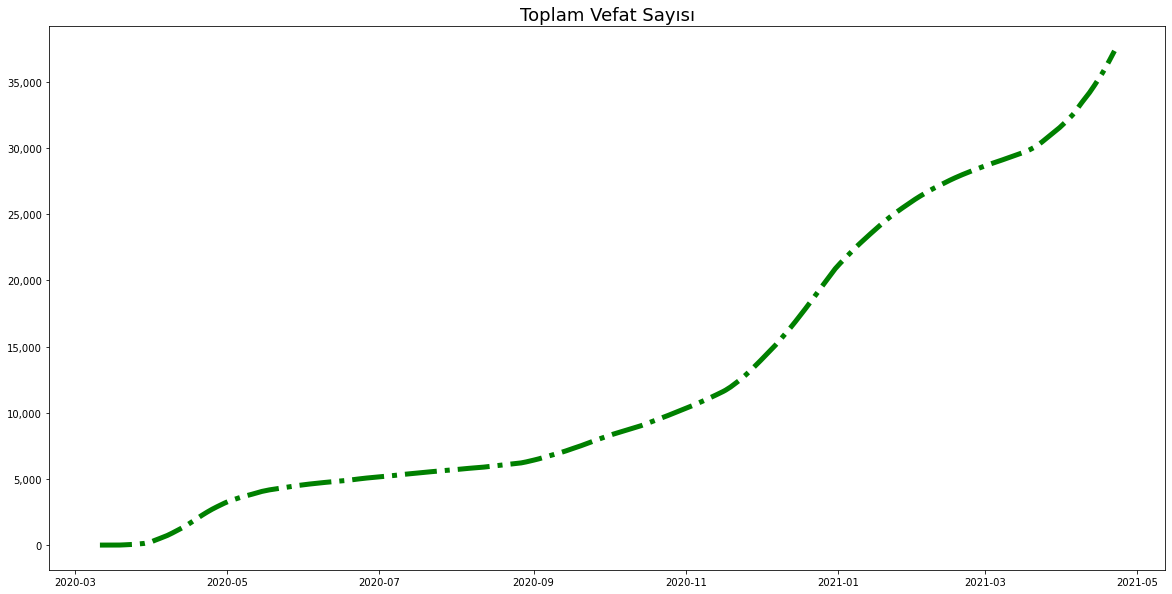

In [337]:
import matplotlib
import matplotlib.pyplot as plt
list_select=["Toplam Vaka Sayısı", "Toplam Test Sayısı", "Toplam Vefat Sayısı"]

fig, ax = plt.subplots(figsize=(20,10))
plt.title("Toplam Vaka Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vaka Sayısı"],lw=5,color="#FF0000")



fig, ax = plt.subplots(figsize=(20,10))
plt.title("Toplam Test Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Test Sayısı"],"--",lw=5,color="#8E44AD")




fig, ax = plt.subplots(figsize=(20,10))
plt.title("Toplam Vefat Sayısı", fontsize=18)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.plot(new_df["Toplam Vefat Sayısı"],"-.",lw=5,color="#008000")



## Model

In [338]:
df.corr()

,Toplam Test Sayısı,Toplam Vaka Sayısı,Toplam Vefat Sayısı,Hastalarda Zatürre Oranı (%),Ağır Hasta Sayısı,Toplam İyileşen Hasta Sayısı,Bugünkü Vaka Sayısı,Bugünkü Hasta Sayısı,Bugünkü Test Sayısı,Bugünkü Vefat Sayısı,Bugünkü İyileşen Sayısı
Toplam Test Sayısı,1.000000,0.958510,0.992858,-0.109327,0.573712,0.956753,0.732839,0.021137,0.884748,0.695270,0.718046
Toplam Vaka Sayısı,0.958510,1.000000,0.975265,-0.234426,0.437477,0.996027,0.742903,-0.095490,0.806667,0.687600,0.791593
Toplam Vefat Sayısı,0.992858,0.975265,1.000000,-0.158595,0.507166,0.976103,0.711766,-0.045314,0.847053,0.665753,0.715397
Hastalarda Zatürre Oranı (%),-0.109327,-0.234426,-0.158595,1.000000,0.023705,-0.230796,-0.227718,-0.067787,0.027745,-0.163228,-0.216834
Ağır Hasta Sayısı,0.573712,0.437477,0.507166,0.023705,1.000000,0.412416,0.605206,0.642502,0.774398,0.801236,0.511966
Toplam İyileşen Hasta Sayısı,0.956753,0.996027,0.976103,-0.230796,0.412416,1.000000,0.703290,-0.134833,0.783990,0.656778,0.764499
Bugünkü Vaka Sayısı,0.732839,0.742903,0.711766,-0.227718,0.605206,0.703290,1.000000,0.375660,0.837242,0.817348,0.874093
Bugünkü Hasta Sayısı,0.021137,-0.095490,-0.045314,-0.067787,0.642502,-0.134833,0.375660,1.000000,0.307357,0.534944,0.172145
Bugünkü Test Sayısı,0.884748,0.806667,0.847053,0.027745,0.774398,0.783990,0.837242,0.307357,1.000000,0.842777,0.785253
Bugünkü Vefat Sayısı,0.695270,0.687600,0.665753,-0.163228,0.801236,0.656778,0.817348,0.534944,0.842777,1.000000,0.805935


In [339]:
from statsmodels.tsa.stattools import adfuller
def testStationarity(ts):
    dftest = adfuller(ts)
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

testStationarity(new_df["Bugünkü Vaka Sayısı"])

Test Statistic                  -1.559544
p-value                          0.503877
#Lags Used                      16.000000
Number of Observations Used    391.000000
Critical Value (1%)             -3.447186
Critical Value (5%)             -2.868960
Critical Value (10%)            -2.570723
dtype: float64

In [340]:
#!pip install pmdarima

In [341]:
b_vaka_df = new_df["Bugünkü Vaka Sayısı"]
#df['Tarih'] = df['Tarih'].apply(date_convert)
b_vaka_df = pd.DataFrame(b_vaka_df)
b_vaka_df

,Bugünkü Vaka Sayısı
Tarih,
2020-03-11,1.0
2020-03-12,0.0
2020-03-13,4.0
2020-03-14,1.0
2020-03-15,12.0
...,...
2021-04-18,55802.0
2021-04-19,55149.0
2021-04-20,61028.0


In [342]:
#b_vaka_df.iloc[259:-1]

In [343]:
from pmdarima.arima import auto_arima
results = auto_arima(b_vaka_df, start_p=1, start_q=1, max_p=3, max_q=3, m=12, start_P=0, seasonal=True, d=1, D=1, trace=True, error_action='ignore',
suppress_warnings=True, stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.77 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=7212.266, Time=0.05 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=7114.652, Time=0.57 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.56 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=7211.875, Time=0.04 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=7074.831, Time=1.54 sec
 ARIMA(1,1,0)(2,1,1)[12]             : AIC=inf, Time=2.56 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=inf, Time=0.84 sec
 ARIMA(0,1,0)(2,1,0)[12]             : AIC=7079.488, Time=0.43 sec
 ARIMA(2,1,0)(2,1,0)[12]             : AIC=7073.209, Time=1.85 sec
 ARIMA(2,1,0)(1,1,0)[12]             : AIC=7110.210, Time=0.70 sec
 ARIMA(2,1,0)(2,1,1)[12]             : AIC=inf, Time=2.92 sec
 ARIMA(2,1,0)(1,1,1)[12]             : AIC=inf, Time=0.95 sec
 ARIMA(3,1,0)(2,1,0)[12]             : AIC=7074.148, Time=2.22 sec
 ARIMA(2,1,1)(2,1,0)[12]             : AIC=7074.8

In [344]:
results.aic()

7072.6687540859475

In [345]:
import statsmodels.api as sm
mod = sm.tsa.statespace.SARIMAX(b_vaka_df,
                                order=(3,1,1),
                                seasonal_order=(2,1,0, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'
D:\C\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  warnings.warn('No frequency information was'


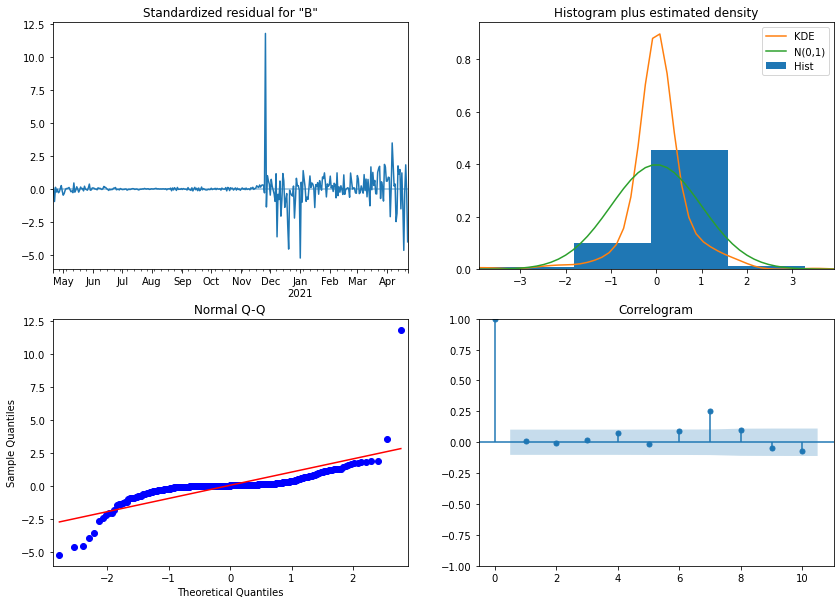

In [346]:
results.plot_diagnostics(figsize=(14,10))
plt.show()

In [347]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-25'),dynamic=False)
pred_ci = pred.conf_int()

In [348]:
pred_ci['Predicted'] = (pred_ci['lower Bugünkü Vaka Sayısı'] + pred_ci['upper Bugünkü Vaka Sayısı'])/2
pred_ci['Observed'] = b_vaka_df['Bugünkü Vaka Sayısı']
pred_ci['Diff, %%'] = ((pred_ci['Predicted'] / pred_ci['Observed'])-1) * 100
pred_ci.tail(8)

,lower Bugünkü Vaka Sayısı,upper Bugünkü Vaka Sayısı,Predicted,Observed,"Diff, %%"
2021-04-15,60527.056886,67950.604077,64238.830481,61400.0,4.623502
2021-04-16,57042.504388,64466.051578,60754.277983,63082.0,-3.689994
2021-04-17,61240.758621,68664.305812,64952.532217,62606.0,3.748095
2021-04-18,60886.600157,68310.147348,64598.373753,55802.0,15.763546
2021-04-19,51754.020632,59177.567822,55465.794227,55149.0,0.574433
2021-04-20,53833.806577,61257.353767,57545.580172,61028.0,-5.706266
2021-04-21,58769.997589,66193.544779,62481.771184,61967.0,0.830718
2021-04-22,58653.547746,66077.094937,62365.321341,54791.0,13.824025


In [351]:
pred_uc = results.get_forecast(steps=4)


pred_ci = pred_uc.conf_int()

In [352]:
value = pred_uc.predicted_mean.copy() 
value.index = pd.DatetimeIndex(["2021-05-01","2021-06-01","2021-07-01","2021-08-01"])
value = pd.DataFrame(value)
value.columns = ["Tahmin"]
value

,Tahmin
2021-05-01,54556.546439
2021-06-01,57371.439612
2021-07-01,60241.731939
2021-08-01,61451.133325


In [353]:
deneme=value.copy()
deneme.columns=["Bugünkü Vaka Sayısı"]
deneme

,Bugünkü Vaka Sayısı
2021-05-01,54556.546439
2021-06-01,57371.439612
2021-07-01,60241.731939
2021-08-01,61451.133325


In [354]:
dff

,Bugünkü Vaka Sayısı
2020-11-25,28351.000000
2020-11-26,29132.000000
2020-11-27,29845.000000
2020-11-28,30103.000000
2020-11-29,29281.000000
...,...
2020-11-01,63272.153967
2021-05-01,65910.186346
2021-06-01,67013.632852
2021-07-01,68046.363039


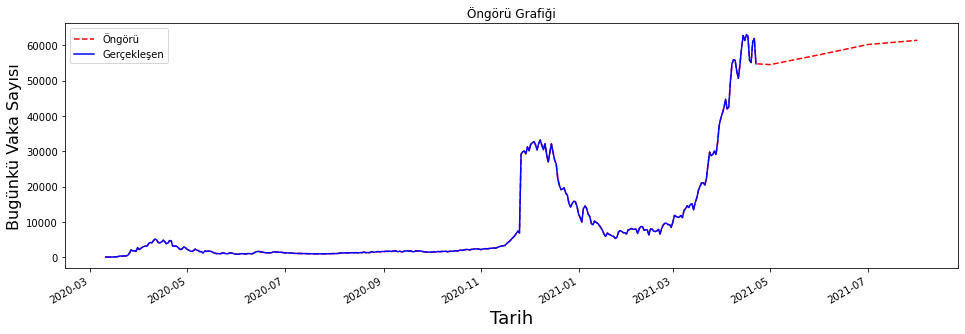

In [355]:
deneme=value.copy()
deneme.columns=["Bugünkü Vaka Sayısı"]
dff=pd.concat([b_vaka_df,deneme])
plt.figure(figsize=(16,5))
dff["Bugünkü Vaka Sayısı"].plot(title="Öngörü Grafiği",color="r",marker=".",ms=0,ls="--")
b_vaka_df["Bugünkü Vaka Sayısı"].plot(color="b",marker=".",ms=0,ls="-",)
plt.xlabel('Tarih', fontsize=18)
plt.ylabel('Bugünkü Vaka Sayısı', fontsize=16)
plt.legend(["Öngörü","Gerçekleşen"],loc="upper left")